# Explaining Sentiment Analysis with Logistic Regression
## SHAP Test 1

https://slundberg.github.io/shap/notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html

In [3]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap as shap

In [4]:
shap.initjs()

In [5]:
## get imdb movie reviews dataset
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

## compute num stats of word importance
vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [8]:
## train a Log Reg model
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [10]:
## get SHAP values
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions

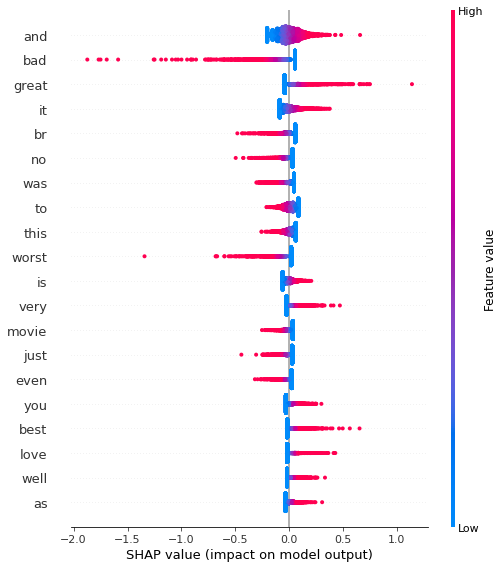

In [11]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [26]:
## Explain the first review's predictions
## HIGHER value = more negative sentiment
## so RED color raises the positive score of the review
ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names()
)